In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [19]:
from sklearn.decomposition import PCA
from IPython.display import clear_output

In [3]:
df = pd.read_csv('./assets/new_data.csv')
df.head(3)

,ID,Name,Calories/g,Protein/g,Carbohydrate/g,Sugar/g,Fat/g,Fibre/g,Protein/kcal,Price/g,...,Egg,Nuts,Soy,chocolate,cookie,fruit,lemon,mint,nut,white
0,1,Amazon Brand - Amfit Nutrition Low Sugar (Cho...,0.129101,0.741667,0.309322,0.041750,0.082569,0.509091,0.771186,0.086957,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Amazon Brand - Amfit Nutrition Low Sugar (Cook...,0.129101,0.741667,0.309322,0.033797,0.087156,0.527273,0.771186,0.057971,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,Amazon Brand - Amfit Nutrition Low Sugar (Peanut),0.159478,0.736111,0.294492,0.043738,0.116972,0.516364,0.745763,0.043478,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
df2 = df.iloc[:, 2:] 

In [16]:
cluster = df2

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(cluster)
    distortions.append(kmeanModel.inertia_)

/Users/tamaramarie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tamaramarie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tamaramarie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tamaramarie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

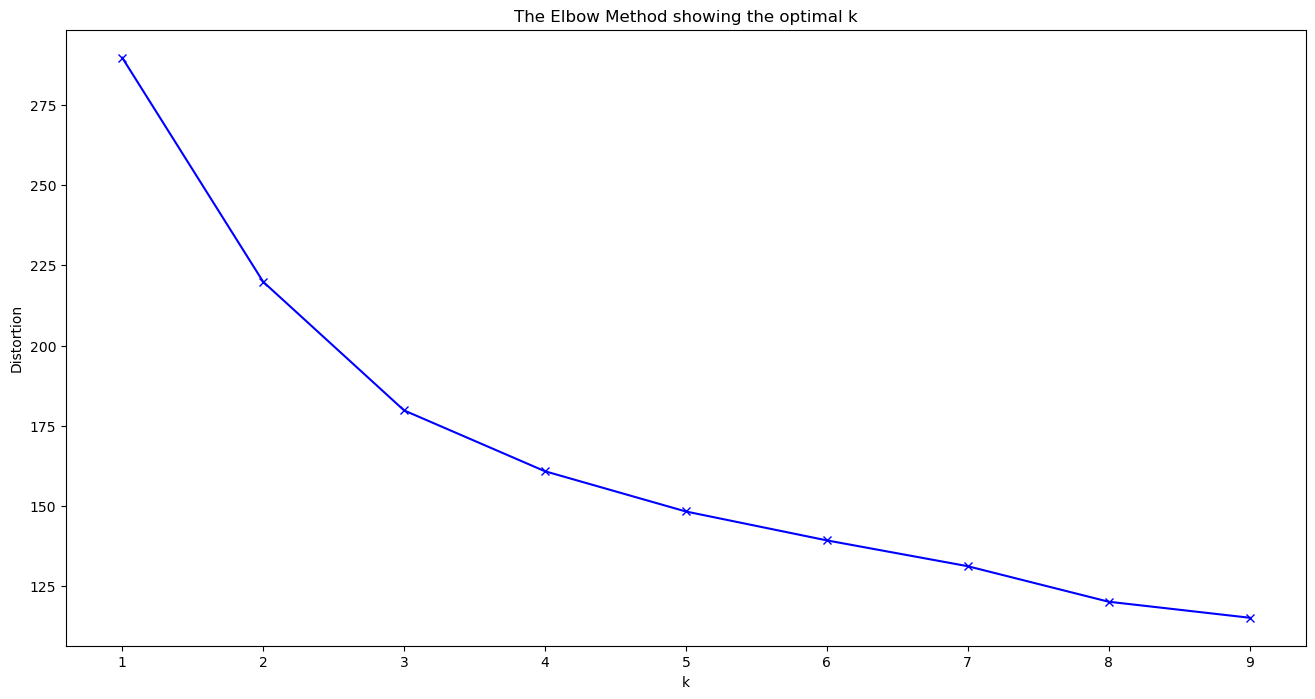

In [17]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Taking k = 3

In [10]:
def random_centroid(data, k):
    centroids = []
    for i in range(k):  
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [11]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis = 1)))
    return distances.idxmin(axis = 1)

In [12]:
def new_centroids(data, labels, k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T # natural log

In [13]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components = 2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait = True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c = labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

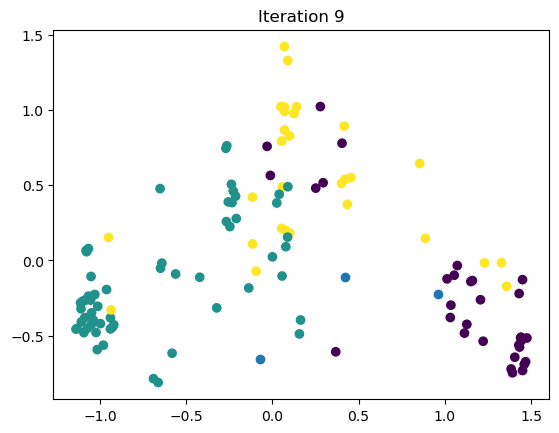

In [22]:
max_iteration = 100
k = 3

centroids = random_centroid(df2, k)
old_centroids = pd.DataFrame()

iteration = 1

while iteration < max_iteration and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(df2, centroids)
    centroids = new_centroids(df2, labels, k)
    plot_clusters(df2, labels, centroids, iteration)
    iteration += 1